# Bank Churn Rate Prediction/Classification

# PROJECT OVERVIEW

Bank customers come and go. It's to the bank's core interest that they can keep their customers.

Therefore, it is meaningful to study the customers' churn rate. Churning means that the client has left the bank.From this dataset, we can briefly look at some of the key characteristics of the customers, and hopefully, we can train a good model for churning classification of the customers.

### In this notebook we are trying to build a good classification model for future predicting customer behaviours.

data source: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset

Let's import some useful modules to start.

In [2]:
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import scipy.linalg as linalg
import statsmodels.formula.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

Matplotlib is building the font cache; this may take a moment.


In [3]:
bc=pd.read_csv("Bank Customer Churn Prediction.csv")

# Quick Glance of the dataset

In [4]:
#briefly look at the variables that we have
bc.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



Customer_id is the unique identifier of each column. Credit_score, gender, balance, estimated_salary, active_member, and age are self-explanatory. Country represents for the country of residence of the customer. Tenure here means how many years the customer is having bank acc in ABC Bank. Credit_card is a binary variable indicating whether this customer has a credit card with the bank. Churn is dichotomous as well, with 1 meaning the customer left the bank and 0 the otherwise.

In [5]:
#check about missing values
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


We can see that this dataset has 12 variables and no missing value is spotted. 

I am dropping the customer_id column as it does not help with the analysis.

In [6]:
del bc['customer_id']

In [7]:
bc.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Descriptive stats and Visualization

After making sure that the data is clean, we can now look at some descriptive statistics and plot some distributions to have some basic ideas about the customers.

In [8]:
bc.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


We can see from the descriptives that the customers' credit_score ranges from 350 to 850. All customers are above 18. We have a lot of 0-balance accounts(more than 25%) and someone's estimated_salary is 11.58 dollars. These may contain problematic values.

In [9]:
bc['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
bc['gender'].unique()

array(['Female', 'Male'], dtype=object)

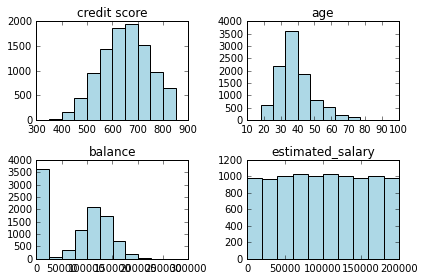

In [11]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
plt.rcParams["figure.figsize"] = (10,8)

ax0.hist(bc['credit_score'], color = 'lightblue', edgecolor = 'black')
ax0.set_title('credit score')

ax1.hist(bc['age'], color = 'lightblue', edgecolor = 'black')
ax1.set_title('age')

ax2.hist(bc['balance'], color = 'lightblue', edgecolor = 'black')
ax2.set_title('balance')

ax3.hist(bc['estimated_salary'], color = 'lightblue', edgecolor = 'black')
ax3.set_title('estimated_salary')

fig.tight_layout()
plt.show()


We can see that aside from the estimated salary, the other distributions roughly resembles normal distribution. Also, there is a large portion of the data where the customers' balance is 0.

<AxesSubplot:xlabel='churn', ylabel='tenure'>

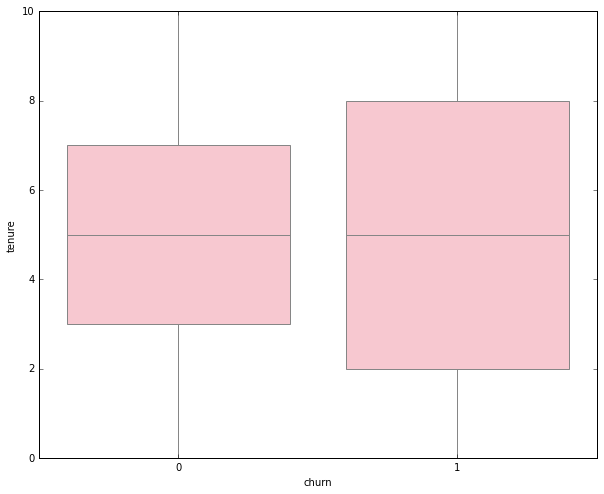

In [12]:
#We look at the box plot for tenure by different churn rates
sns.boxplot(x='churn', y='tenure', data=bc,color="pink")

We can see from the box plot that the mean tenure for leaving customers and staying ones are roughly the same. The range, however, is different, with the leaving customers have a higher range.

<AxesSubplot:xlabel='churn', ylabel='products_number'>

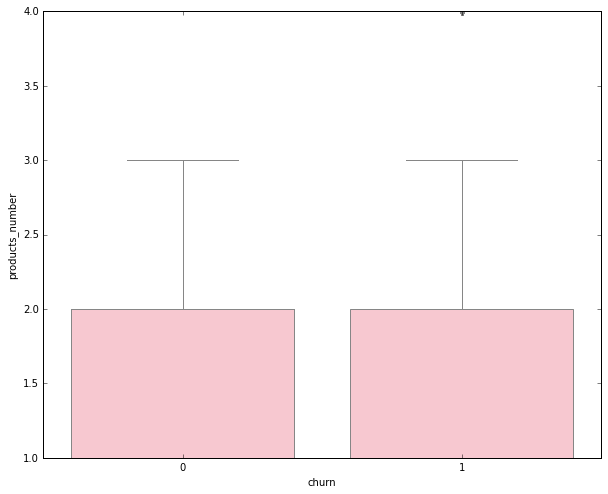

In [13]:
sns.boxplot(x='churn', y='products_number', color="pink",data=bc)

From the boxplot, the number of products does not see an obvious difference between churning and staying customers.

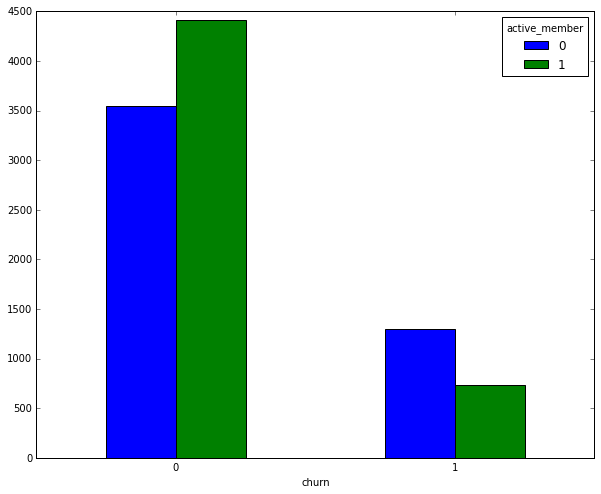

In [14]:
crosstb1 = pd.crosstab(bc.churn, bc.active_member)
 
# Creating barplot
barplot = crosstb1.plot.bar(rot=0)

From this plot, we can see active members relatively are less likely to churn. Among churning customers there are more non-active members and among those who are staying, there are more active members.

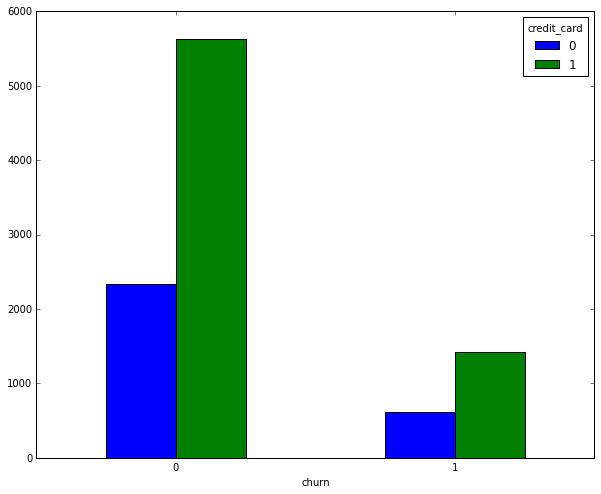

In [15]:
crosstb2 = pd.crosstab(bc.churn, bc.credit_card)
 
# Creating barplot
barplot = crosstb2.plot.bar(rot=0)

From this bar chart alone, we may not be able to conclude whether having a credict card is associated with churning.

# Classification Models

### train/test split

In [16]:
#encode string variables first so that the classfication models understand
le = preprocessing.LabelEncoder()
bc['country'] = le.fit_transform(bc['country'])
bc['gender'] = le.fit_transform(bc['gender'])

In [17]:
X= bc[['credit_score','country','gender','age','tenure','balance','products_number','credit_card','active_member','estimated_salary']]
y= bc[["churn"]]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=6, stratify=y)

### logistic classification

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=8, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/lib/python3.7/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#let's see the performance of the model
print("Accurary:",lr.score(X_test,y_test))
print("F1 score:", f1_score(y_test,y_pred_lr,average="weighted"))
print("Precision:", precision_score(y_test,y_pred_lr,average="weighted"))
print("Recall:", recall_score(y_test,y_pred_lr,average="weighted"))

Accurary: 0.7945
F1 score: 0.7238345510624777
Precision: 0.7326742657103825
Recall: 0.7945


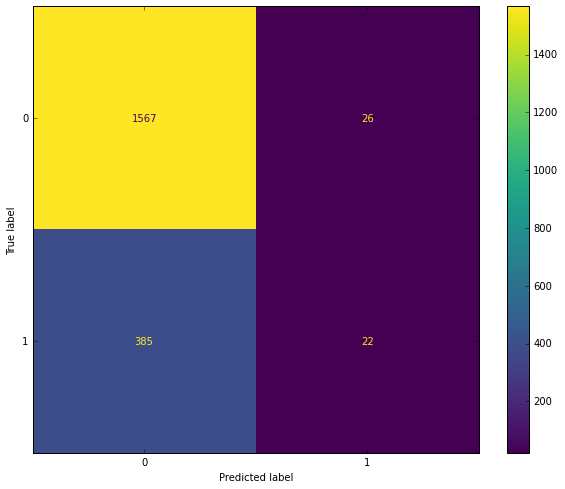

In [21]:
#plot the confusion matrix
con=confusion_matrix(y_test,y_pred_lr,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=con, display_labels=lr.classes_)
disp.plot(values_format=".5g")
plt.show()

### Decision Tree Classification

In [22]:
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    random_state=8)
tree_model.fit(X_train,y_train)
y_pred_tree=tree_model.predict(X_test)

In [23]:
#let's see the performance of the model
print("Accurary:",tree_model.score(X_test,y_test))
print("F1 score:", f1_score(y_test,y_pred_tree,average="weighted"))
print("Precision:", precision_score(y_test,y_pred_tree,average="weighted"))
print("Recall:", recall_score(y_test,y_pred_tree,average="weighted"))

Accurary: 0.8445
F1 score: 0.8293220757881764
Precision: 0.8308006241714538
Recall: 0.8445


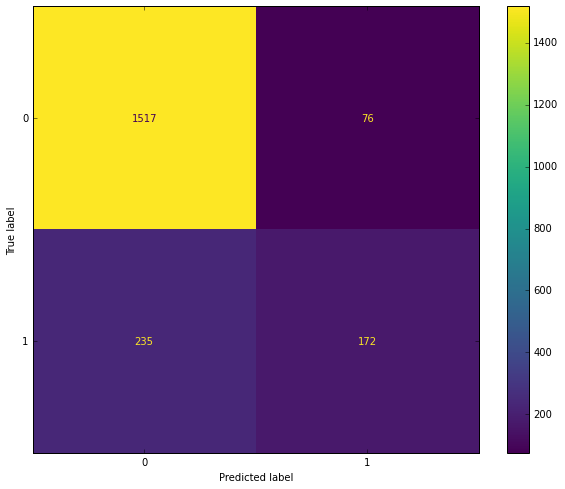

In [24]:
#plot the confusion matrix
con1=confusion_matrix(y_test,y_pred_tree,labels=tree_model.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=con1, display_labels=tree_model.classes_)
disp1.plot(values_format=".5g")
plt.show()

### CONCLUSIONS AND FUTURE WORK

Comparing these two models, we can see that the decision tree classification model has a higher score of accuracy. 

Also, as churning creates crucial financial burdens to the bank, we want to focus on the false-negative score. Using logistic classification model, we misclassified 385 customers who are actually churning as retaining customers. For the decision tree model, the number is 235, which is much smaller.

Therefore, I would use the decision tree model as future prediction models.

In addition, it is possible to further improve the decision trees. We can further tune the parameter of the decision tree model to find the optimal value when aming for, let's say, highest accuracy.